In [17]:
%pip install gradio


  Using cached aiofiles-24.1.0-py3-none-any.whl.metadata (10 kB)
  Using cached fastapi-0.117.1-py3-none-any.whl.metadata (28 kB)
  Using cached ffmpy-0.6.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached groovy-0.1.2-py3-none-any.whl.metadata (6.1 kB)
  Using cached pydub-0.25.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached python_multipart-0.0.20-py3-none-any.whl.metadata (1.8 kB)
  Using cached safehttpx-0.1.6-py3-none-any.whl.metadata (4.2 kB)
  Using cached semantic_version-2.10.0-py2.py3-none-any.whl.metadata (9.7 kB)
  Using cached starlette-0.48.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached tomlkit-0.13.3-py3-none-any.whl.metadata (2.8 kB)
   ---------------------------------------- 0.0/60.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/60.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/60.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/60.4 MB ? eta -:--:--
    --------------------------------------- 0.8/

  You can safely remove it manually.


In [1]:
# Importing libraries 
from typing import TypedDict, Dict
from langgraph.graph import StateGraph, END
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables.graph import MermaidDrawMethod
from IPython.display import display, Image
from dotenv import load_dotenv
import os
from openai import OpenAI
import base64



In [2]:
# API key
load_dotenv()
openai_api_key = os.getenv("OPENAI_API_KEY")

if openai_api_key:
    print("OpenAI API Key loaded successfully!")
else:
    raise ValueError("OpenAI API key not found in environment variables.")

OpenAI API Key loaded successfully!


In [3]:
# Initializing OpenAI client
client = OpenAI(api_key=openai_api_key)

In [4]:
# Defining State
class State(TypedDict, total=False):
    query: str
    image: str 
    category: str
    sentiment: str
    response: str

In [26]:
# Node functions

def categorize(state: State) -> State:
    """Classify KSG queries into categories"""
    if state.get("image"):
        content = [
            {"type": "text",
             "text": f"Categorize the following Kenya School of Government (KSG) customer query "
                     f"into one of these categories: Admissions, Training, Certificates, General. "
                     f"Query: {state['query']}"},
            {"type": "image_url", "image_url": {"url": state["image"]}}
        ]
    else:
        content = f"Categorize the following Kenya School of Government (KSG) customer query " \
                  f"into one of these categories: Admissions, Training, Certificates, General. " \
                  f"Query: {state['query']}"

    messages = [{"role": "user", "content": content}]
    response = client.chat.completions.create(
        model="gpt-5-nano-2025-08-07",
        messages=messages,
        temperature=1
    )
    return {"category": response.choices[0].message.content.strip()}


def analyze_sentiment(state: State) -> State:
    """Analyze sentiment"""
    if state.get("image"):
        content = [
            {"type": "text",
             "text": f"Analyze the sentiment of the following KSG customer query. "
                     f"Respond with either 'Positive', 'Neutral', or 'Negative'. Query: {state['query']}"},
            {"type": "image_url", "image_url": {"url": state["image"]}}
        ]
    else:
        content = f"Analyze the sentiment of the following KSG customer query. " \
                  f"Respond with either 'Positive', 'Neutral', or 'Negative'. Query: {state['query']}"

    messages = [{"role": "user", "content": content}]
    response = client.chat.completions.create(
        model="gpt-5-nano-2025-08-07",
        messages=messages,
        temperature=1
    )
    return {"sentiment": response.choices[0].message.content.strip()}


def handle_admissions(state: State) -> State:
    """Admissions/Application support"""
    if state.get("image"):
        content = [
            {"type": "text",
             "text": f"You are a Kenya School of Government support assistant. "
                     f"Provide an admissions/application support response to the following query: {state['query']}"},
            {"type": "image_url", "image_url": {"url": state["image"]}}
        ]
    else:
        content = f"You are a Kenya School of Government support assistant. " \
                  f"Provide an admissions/application support response to the following query: {state['query']}"

    messages = [{"role": "user", "content": content}]
    response = client.chat.completions.create(
        model="gpt-5-nano-2025-08-07",
        messages=messages,
        temperature=1
    )
    return {"response": response.choices[0].message.content.strip()}


def handle_training(state: State) -> State:
    """Training/Program info"""
    if state.get("image"):
        content = [
            {"type": "text",
             "text": f"You are a Kenya School of Government support assistant. "
                     f"Provide a training/program information response to the following query: {state['query']}"},
            {"type": "image_url", "image_url": {"url": state["image"]}}
        ]
    else:
        content = f"You are a Kenya School of Government support assistant. " \
                  f"Provide a training/program information response to the following query: {state['query']}"

    messages = [{"role": "user", "content": content}]
    response = client.chat.completions.create(
        model="gpt-5-nano-2025-08-07",
        messages=messages,
        temperature=1
    )
    return {"response": response.choices[0].message.content.strip()}


def handle_certificates(state: State) -> State:
    """Certificates/Verification support"""
    if state.get("image"):
        content = [
            {"type": "text",
             "text": f"You are a Kenya School of Government support assistant. "
                     f"Provide a certificates/verification support response to the following query: {state['query']}"},
            {"type": "image_url", "image_url": {"url": state["image"]}}
        ]
    else:
        content = f"You are a Kenya School of Government support assistant. " \
                  f"Provide a certificates/verification support response to the following query: {state['query']}"

    messages = [{"role": "user", "content": content}]
    response = client.chat.completions.create(
        model="gpt-5-nano-2025-08-07",
        messages=messages,
        temperature=1
    )
    return {"response": response.choices[0].message.content.strip()}


def handle_general(state: State) -> State:
    """General support response"""
    if state.get("image"):
        content = [
            {"type": "text",
             "text": f"You are a Kenya School of Government support assistant. "
                     f"Provide a general support response to the following query: {state['query']}"},
            {"type": "image_url", "image_url": {"url": state["image"]}}
        ]
    else:
        content = f"You are a Kenya School of Government support assistant. " \
                  f"Provide a general support response to the following query: {state['query']}"

    messages = [{"role": "user", "content": content}]
    response = client.chat.completions.create(
        model="gpt-5-nano-2025-08-07",
        messages=messages,
        temperature=1
    )
    return {"response": response.choices[0].message.content.strip()}

def escalate(state: State) -> State:
    """
    Handles escalation when sentiment is negative.
    """
    return {
        "response": "This query has been escalated to a human KSG agent due to its negative sentiment."
    }


In [13]:
# Router
def route_query(state: State) -> str:
    if state.get('sentiment', '').strip().lower() == 'negative':
        return "escalate"
    
    category = state.get('category', '').strip().lower()
    if "admission" in category:
        return "handle_admissions"
    elif "training" in category or "program" in category:
        return "handle_training"
    elif "certificate" in category or "verification" in category:
        return "handle_certificates"
    else:
        return "handle_general"


In [14]:
# workflow
workflow = StateGraph(State)
workflow.add_node("categorize", categorize)
workflow.add_node("analyze_sentiment", analyze_sentiment)
workflow.add_node("handle_admissions", handle_admissions)
workflow.add_node("handle_training", handle_training)
workflow.add_node("handle_certificates", handle_certificates)
workflow.add_node("handle_general", handle_general)
workflow.add_node("escalate", escalate)

workflow.add_edge("categorize", "analyze_sentiment")
workflow.add_conditional_edges(
    "analyze_sentiment",
    route_query,
    {
        "handle_admissions": "handle_admissions",
        "handle_training": "handle_training",
        "handle_certificates": "handle_certificates",
        "handle_general": "handle_general",
        "escalate": "escalate"
    }
)

workflow.add_edge("handle_admissions", END)
workflow.add_edge("handle_training", END)
workflow.add_edge("handle_certificates", END)
workflow.add_edge("handle_general", END)
workflow.add_edge("escalate", END)

workflow.set_entry_point("categorize")
app = workflow.compile()

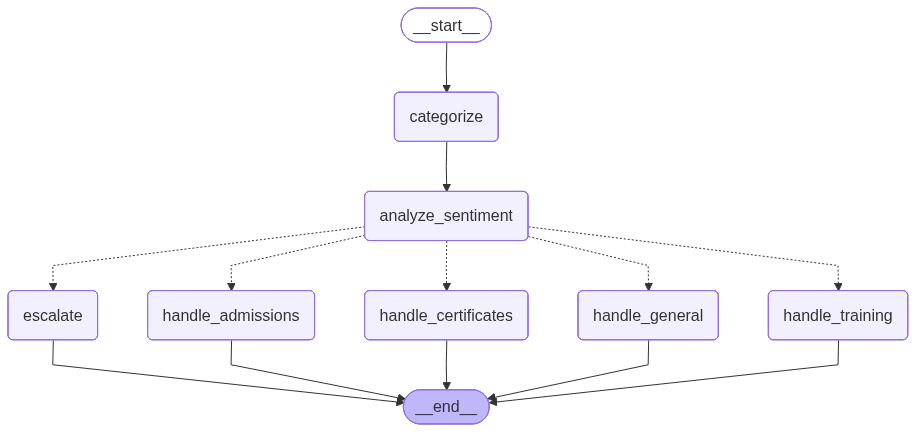

In [15]:
# Visualizing
display(Image(app.get_graph().draw_mermaid_png(draw_method=MermaidDrawMethod.API)))

In [ ]:
# Running KSG Support
import base64
import requests
from io import BytesIO

def url_to_base64(image_url: str) -> str:
    """Download an image from a URL and return a base64 data URI."""
    resp = requests.get(image_url)
    resp.raise_for_status()
    image_bytes = resp.content
    
    mime = "image/jpeg"
    if image_url.lower().endswith(".png"):
        mime = "image/png"
    return f"data:{mime};base64,{base64.b64encode(image_bytes).decode('utf-8')}"

def run_customer_support(query: str, image: str = None):
    """
    Wrapper to invoke the KSG support workflow.
    `image` can be:
      - None
      - a local file path (string)
      - a base64 data URI (string)
      - a URL to an image (string)
    """
    state = {"query": query}

    if image:
        
        if isinstance(image, str) and image.startswith("http"):
            try:
                image_b64 = url_to_base64(image)
                state["image"] = image_b64
            except Exception as e:
                print("Could not download/convert image from URL:", e)
        
        elif isinstance(image, str) and not image.startswith("data:"):
            with open(image, "rb") as f:
                image_bytes = f.read()
            image_b64 = base64.b64encode(image_bytes).decode("utf-8")
            state["image"] = f"data:image/jpeg;base64,{image_b64}"
        else:
            
            state["image"] = image

    # Calling your graph app
    result = app.invoke(state)

    return {
        "category": result.get("category"),
        "sentiment": result.get("sentiment"),
        "response": result.get("response")
    }


In [25]:
# testing
output_text_only = run_customer_support("How do I apply for the next leadership training at KSG?")
print(output_text_only)

{'category': 'Training', 'sentiment': 'Neutral', 'response': 'Here’s how you can apply for the next Leadership Training at the Kenya School of Government (KSG):\n\n- Identify the exact program and intake\n  - Visit the official KSG website and go to the Programs/Training Calendar or Leadership & Governance section.\n  - Note the next intake dates, duration, eligibility, and whether the program is for public officers, private sector, or general leadership.\n\n- Create or log into the online application\n  - Use the KSG online application portal (the site will guide you to create an account if you don’t have one).\n  - Complete the applicant profile with your personal and contact details.\n\n- Prepare and upload required documents\n  Commonly required documents include:\n  - Valid national ID or passport\n  - Current employment verification or endorsement from your supervisor/line manager\n  - Letter of motivation or statement of interest (why you want to attend)\n  - Curriculum Vitae or

Created dataset file at: .gradio\flagged\dataset1.csv


In [24]:
output = run_customer_support(
    "Please describe this certificate image",
    image="https://images.pexels.com/photos/794212/pexels-photo-794212.jpeg"
)

print("Category:", output["category"])
print("Sentiment:", output["sentiment"])
print("Response:", output["response"])

Category: Certificates
Sentiment: Neutral
Response: Thank you for reaching out. I can help, but the image you uploaded does not appear to show a certificate. It looks like a large, busy indoor public space (a grand transit hall) with a central clock, a circular information/kiosk in the middle, staircases on both sides, and many people walking around. There are signs along the walls such as “Ticket Machines,” “Subway 42nd St,” and “West Balcony,” with multiple levels and warm lighting. It’s a bustling landmark interior, not a certificate.

To help you with certificate description and verification, here’s a practical approach:

What a certificate image should contain for verification
- Issuer name: The organization issuing the certificate (e.g., Kenya School of Government or a partner institution).
- Recipient name: The person to whom the certificate was issued.
- Title of the certificate: e.g., “Certificate in Public Service Leadership,” etc.
- Date of issue: The exact date when the cer

In [ ]:
import gradio as gr
import base64
import os

def customer_support_ui(query, file_image, url_image):
    image_url = None

    # when file is uploaded
    if file_image is not None:
        with open(file_image.name, "rb") as f:
            image_bytes = f.read()
        image_b64 = base64.b64encode(image_bytes).decode("utf-8")
        image_url = f"data:image/jpeg;base64,{image_b64}"
    
    # If URL is provided
    elif url_image:
        image_url = url_image.strip() 

    # Calling backend
    result = run_customer_support(query, image=image_url)
    return result['category'], result['sentiment'], result['response']

iface = gr.Interface(
    fn=customer_support_ui,
    inputs=[
        gr.Textbox(label="Enter your query", placeholder="Type your KSG question here..."),
        gr.File(label="Upload a certificate (optional)"),
        gr.Textbox(label="Or paste an image URL (optional)")
    ],
    outputs=[
        gr.Label(label="Category"),
        gr.Label(label="Sentiment"),
        gr.Textbox(label="Response", lines=15)
    ],
    title="KSG Customer Support Assistant",
    description="Enter a query and optionally upload a certificate or paste an image URL."
)

iface.launch(share=True)


* Running on local URL:  http://127.0.0.1:7861

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.
